In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib

In [2]:
data = pd.read_csv("../../../data/yfinance_data/NVDA_historical_data.csv")

print(data.head())

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
3  1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
4  1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
data.set_index("Date", inplace=True)

## Data Analysis Indicators with Talib

In [4]:
data['SMA_50'] = talib.SMA(data['Close'], timeperiod=50)  # 50-day Simple Moving Average
data['EMA_20'] = talib.EMA(data['Close'], timeperiod=20)  # 20-day Exponential Moving Average


In [5]:
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)


In [6]:
data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(
    data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6421 entries, 1999-01-22 to 2024-07-30
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6421 non-null   float64
 1   High          6421 non-null   float64
 2   Low           6421 non-null   float64
 3   Close         6421 non-null   float64
 4   Adj Close     6421 non-null   float64
 5   Volume        6421 non-null   int64  
 6   Dividends     6421 non-null   float64
 7   Stock Splits  6421 non-null   float64
 8   SMA_50        6372 non-null   float64
 9   EMA_20        6402 non-null   float64
 10  RSI           6407 non-null   float64
 11  MACD          6388 non-null   float64
 12  MACD_Signal   6388 non-null   float64
 13  MACD_Hist     6388 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 752.5+ KB


In [8]:
data['SMA_50']

Date
1999-01-22          NaN
1999-01-25          NaN
1999-01-26          NaN
1999-01-27          NaN
1999-01-28          NaN
                ...    
2024-07-24    117.98118
2024-07-25    118.41880
2024-07-26    118.85288
2024-07-29    119.19208
2024-07-30    119.37950
Name: SMA_50, Length: 6421, dtype: float64

In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,EMA_20,RSI,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


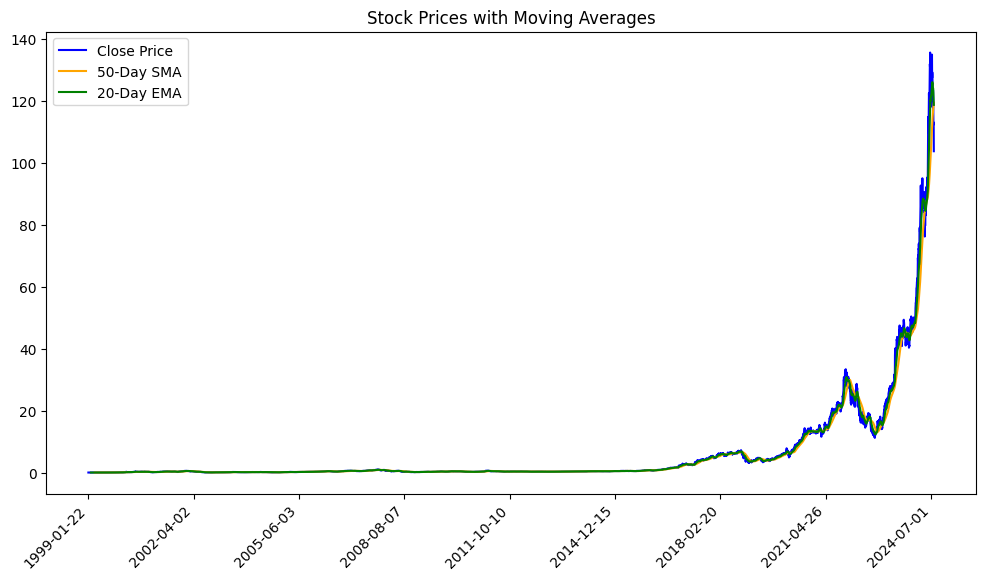

In [10]:

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.title('Stock Prices with Moving Averages')
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.legend()
plt.show()


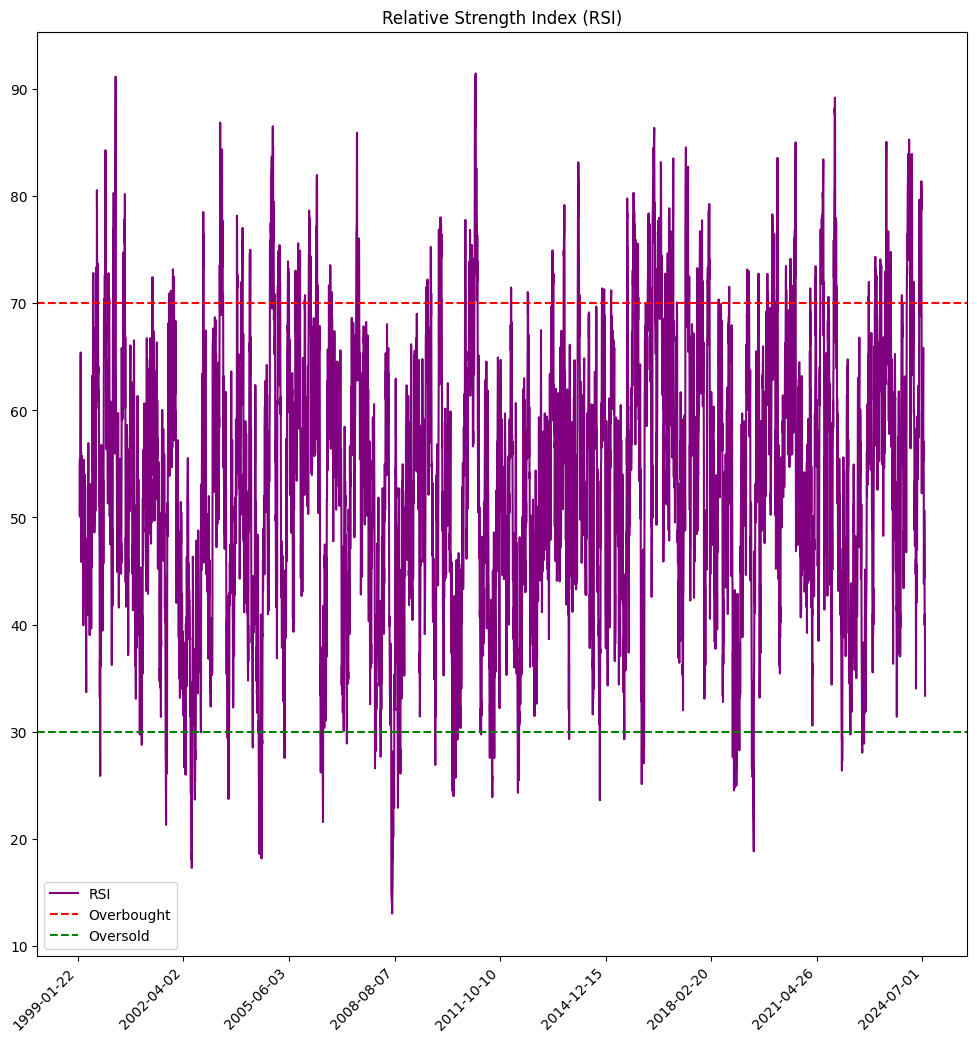

In [11]:
plt.figure(figsize=(12, 12))
plt.plot(data.index, data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.legend()
plt.show()


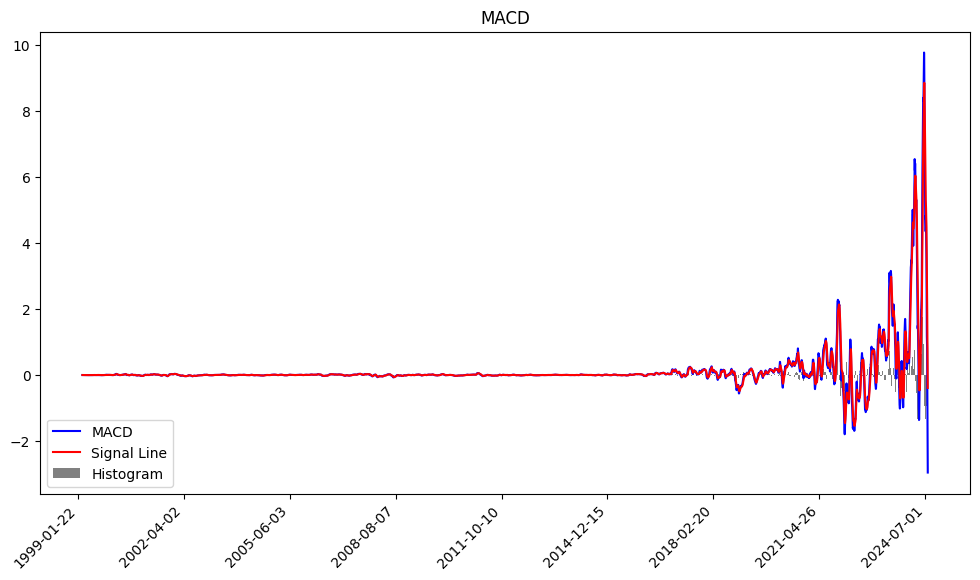

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['MACD'], label='MACD', color='blue')
plt.plot(data.index, data['MACD_Signal'], label='Signal Line', color='red')
plt.bar(data.index, data['MACD_Hist'], label='Histogram', color='gray')
plt.title('MACD')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()


## Using Pynance for Financial Metrics

In [13]:

# Step 2: Calculate log returns for volatility and Sharpe Ratio
data['Log_Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Step 3: Calculate Volatility (Standard deviation of log returns)
volatility = data['Log_Returns'].std() * np.sqrt(252)  # Annualized volatility (252 trading days)

# Step 4: Calculate Sharpe Ratio (Assuming risk-free rate = 0)
sharpe_ratio = data['Log_Returns'].mean() / data['Log_Returns'].std() * np.sqrt(252)

# Step 5: Calculate Maximum Drawdown
data['Cumulative_Returns'] = (1 + data['Log_Returns']).cumprod()
data['Cumulative_Max'] = data['Cumulative_Returns'].cummax()
data['Drawdown'] = data['Cumulative_Returns'] / data['Cumulative_Max'] - 1
max_drawdown = data['Drawdown'].min()

In [14]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,EMA_20,RSI,MACD,MACD_Signal,MACD_Hist,Log_Returns,Cumulative_Returns,Cumulative_Max,Drawdown
Date,,,,,,,,,,,,,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.099632,1.099632,1.099632,0.000000
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.080770,1.010815,1.099632,-0.080770
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.003115,1.007666,1.099632,-0.083633
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.003149,1.004493,1.099632,-0.086518


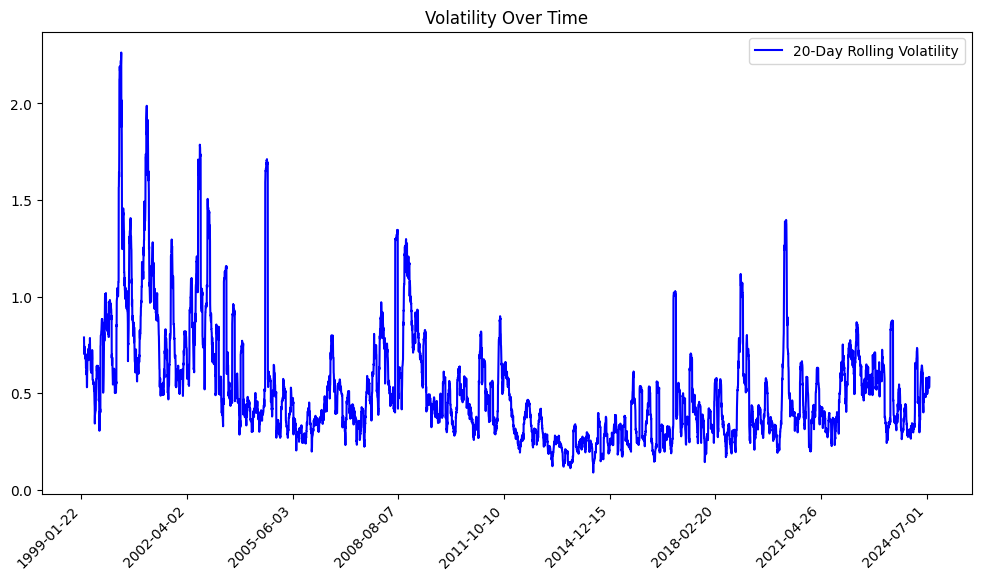

In [15]:
data['Rolling_Volatility'] = data['Log_Returns'].rolling(window=20).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rolling_Volatility'], label='20-Day Rolling Volatility', color='blue')
plt.title('Volatility Over Time')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()


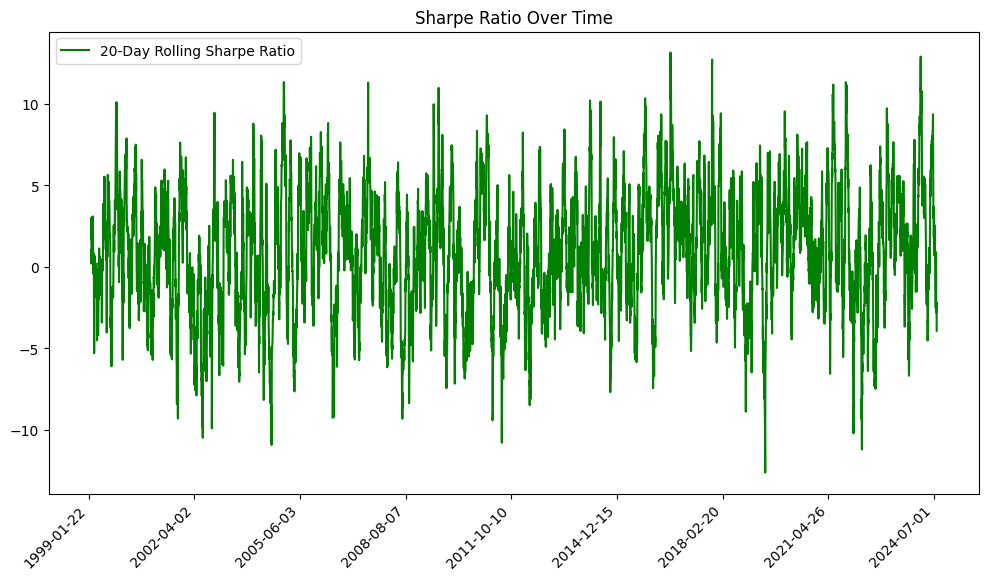

In [16]:
data['Rolling_Sharpe'] = data['Log_Returns'].rolling(window=20).mean() / data['Log_Returns'].rolling(window=20).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rolling_Sharpe'], label='20-Day Rolling Sharpe Ratio', color='green')
plt.title('Sharpe Ratio Over Time')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()


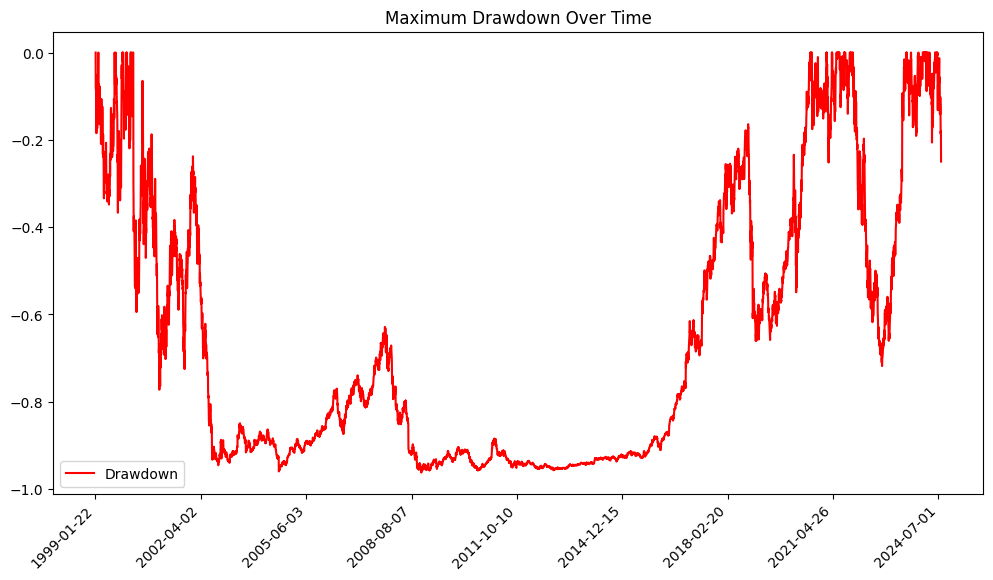

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Drawdown'], label='Drawdown', color='red')
plt.title('Maximum Drawdown Over Time')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()


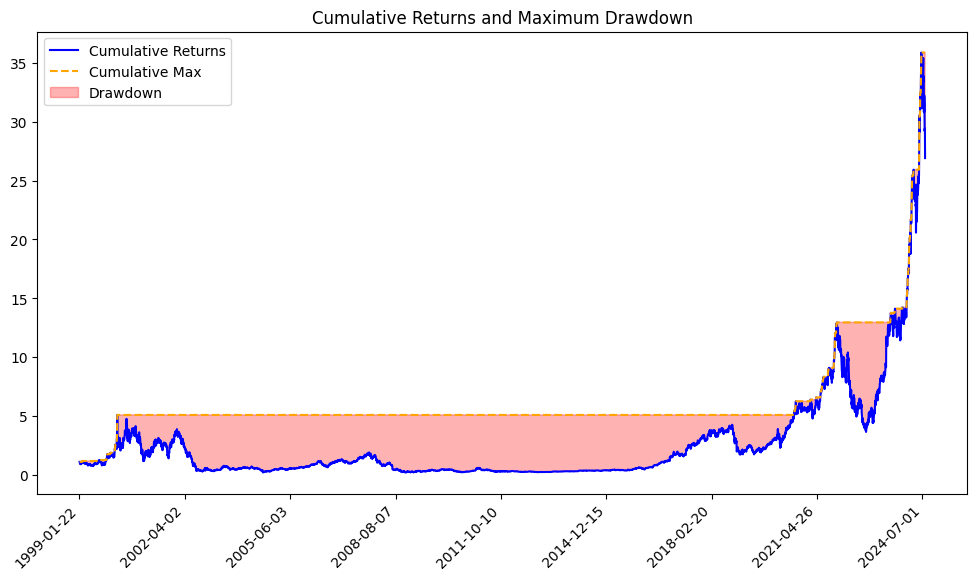

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns', color='blue')
plt.plot(data.index, data['Cumulative_Max'], label='Cumulative Max', color='orange', linestyle='--')
plt.fill_between(data.index, data['Cumulative_Returns'], data['Cumulative_Max'], where=(data['Cumulative_Returns'] < data['Cumulative_Max']), color='red', alpha=0.3, label='Drawdown')
plt.title('Cumulative Returns and Maximum Drawdown')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()